importing and preprocessing data

In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, QuantileTransformer, RobustScaler,MinMaxScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("CC GENERAL.csv")
df.head()
#importing the data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
#exploring the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
# check duplicated data
df.duplicated().sum()

0

In [5]:
# as we have few null values i choosed to drop it
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

In [7]:
# to apply PCA i shoud find out the relation between the features
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.310140,0.176083,0.159985,0.122109,0.495586,-0.088459,0.063832,-0.069582,0.445307,0.382388,0.147887,0.535518,0.322830,0.398669,-0.333594,0.066987
BALANCE_FREQUENCY,0.310140,1.000000,0.122635,0.095254,0.114739,0.089036,0.228158,0.187467,0.184159,0.181132,0.133265,0.183095,0.087682,0.039169,0.132519,-0.156961,0.104714
PURCHASES,0.176083,0.122635,1.000000,0.916780,0.679259,-0.053760,0.393000,0.497384,0.316025,-0.124863,-0.070277,0.688732,0.358425,0.606782,0.093842,0.176447,0.084545
ONEOFF_PURCHASES,0.159985,0.095254,0.916780,1.000000,0.329650,-0.033244,0.265460,0.524514,0.128380,-0.086413,-0.048705,0.545313,0.320613,0.570850,0.048741,0.129890,0.063400
INSTALLMENTS_PURCHASES,0.122109,0.114739,0.679259,0.329650,1.000000,-0.066099,0.441193,0.211829,0.511130,-0.136455,-0.076716,0.626083,0.258057,0.385391,0.132156,0.178440,0.083346
CASH_ADVANCE,0.495586,0.089036,-0.053760,-0.033244,-0.066099,1.000000,-0.218566,-0.090111,-0.178873,0.629030,0.656911,-0.078449,0.304161,0.459342,0.140094,-0.158566,-0.073090
PURCHASES_FREQUENCY,-0.088459,0.228158,0.393000,0.265460,0.441193,-0.218566,1.000000,0.502123,0.862338,-0.316771,-0.208749,0.567168,0.121372,0.100715,0.002979,0.305393,0.052161
ONEOFF_PURCHASES_FREQUENCY,0.063832,0.187467,0.497384,0.524514,0.211829,-0.090111,0.502123,1.000000,0.143911,-0.118225,-0.073384,0.544364,0.295432,0.244346,-0.030357,0.154073,0.080437
PURCHASES_INSTALLMENTS_FREQUENCY,-0.069582,0.184159,0.316025,0.128380,0.511130,-0.178873,0.862338,0.143911,1.000000,-0.268924,-0.172811,0.529192,0.063421,0.083424,0.030036,0.249547,0.065779
CASH_ADVANCE_FREQUENCY,0.445307,0.181132,-0.124863,-0.086413,-0.136455,0.629030,-0.316771,-0.118225,-0.268924,1.000000,0.799593,-0.136913,0.132841,0.182340,0.098844,-0.260001,-0.140038


array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

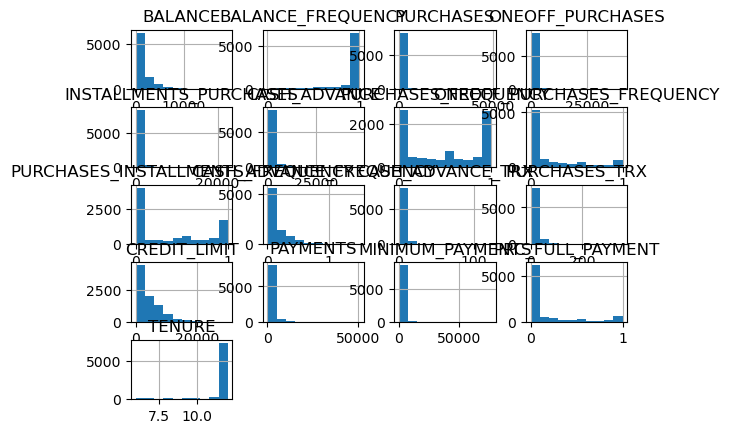

In [8]:
df.hist()
# we couldn't remove outlyers becouse it is important part of our data

In [9]:
df.nunique()

CUST_ID                             8636
BALANCE                             8631
BALANCE_FREQUENCY                     42
PURCHASES                           6015
ONEOFF_PURCHASES                    3922
INSTALLMENTS_PURCHASES              4341
CASH_ADVANCE                        4206
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         203
PAYMENTS                            8636
MINIMUM_PAYMENTS                    8635
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [35]:
# Standardizing the features using robust scalar becouse it is not sensitive to outlyers
df_ =df.drop(columns=["CUST_ID"])
scaler =RobustScaler()
df_ = pd.DataFrame(scaler.fit_transform(df_))

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>],
       [<AxesSubplot:title={'center':'16'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

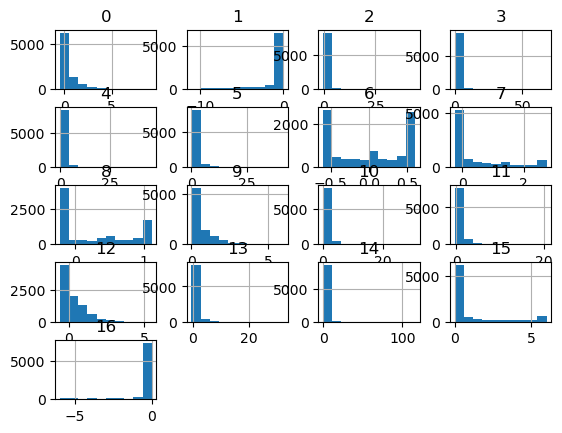

In [11]:
df_std= df_
df_std.hist()

In [13]:
# Table of the amount of variation explained
from sklearn.decomposition import PCA
# Instantiate the PCA
pca = PCA()
# Apply the PCA
df_pca = pca.fit_transform(df_std)
num_com = range(1, 18)
df_com = pd.DataFrame(num_com, columns=['Number of Components'])
ev = pca.explained_variance_
df_ev = pd.DataFrame(ev, columns=['Explained Variance'])
df_ev = pd.concat([df_com, df_ev], axis=1)
df_ev.index = df_ev.index + 1
df_ev
df_ev.style.set_properties(**{'text-align': 'center'})

,Number of Components,Explained Variance
1,1,16.439353
2,2,13.072991
3,3,6.902390
4,4,5.187213
5,5,3.496440
6,6,2.554904
7,7,1.795256
8,8,1.473194
9,9,1.068633
10,10,0.814679


In [14]:
# I choosed 4 becouse of the change in values was very high around it

pca = PCA(n_components=4)

df_pca = pd.DataFrame(pca.fit_transform(df_std))

In [15]:
df_pca.head()

,0,1,2,3
0,-2.596229,-0.171497,-1.071034,0.059703
1,-0.325228,1.774175,3.789276,1.530645
2,-0.233322,-0.315416,-0.519626,-1.795153
3,-2.148961,0.150073,-0.421820,-1.629857
4,1.021615,2.109443,-1.616171,-1.537228


In [16]:
df_pca.corr()

,0,1,2,3
0,1.000000e+00,3.914603e-16,-2.276153e-17,8.619563e-17
1,3.914603e-16,1.000000e+00,6.504415e-17,-1.199098e-17
2,-2.276153e-17,6.504415e-17,1.000000e+00,-7.323289e-17
3,8.619563e-17,-1.199098e-17,-7.323289e-17,1.000000e+00


Start clusterring !!!!!!!!!

In [17]:
df_row = df_pca.copy()

DBSCAN

In [18]:
# we ask for nearest
# to choose eps
nn = NearestNeighbors()

nn.fit(df_row)

distances, neighbors = nn.kneighbors(df_row)

distances

array([[0.        , 0.03017933, 0.05585452, 0.06839215, 0.19251319],
       [0.        , 0.31307531, 0.36364998, 0.54046564, 0.85867943],
       [0.        , 0.14089442, 0.20099595, 0.20833352, 0.22013626],
       ...,
       [0.        , 0.18349378, 0.25262498, 0.32747497, 0.34151449],
       [0.        , 0.4531026 , 0.48088588, 0.4821285 , 0.49541065],
       [0.        , 0.54779981, 0.54877854, 0.55543207, 0.59957198]])

In [19]:
# sort the distances
distances = np.sort(distances[:, 4], axis = 0)

c:\Users\pop\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\Users\pop\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: elbow.png


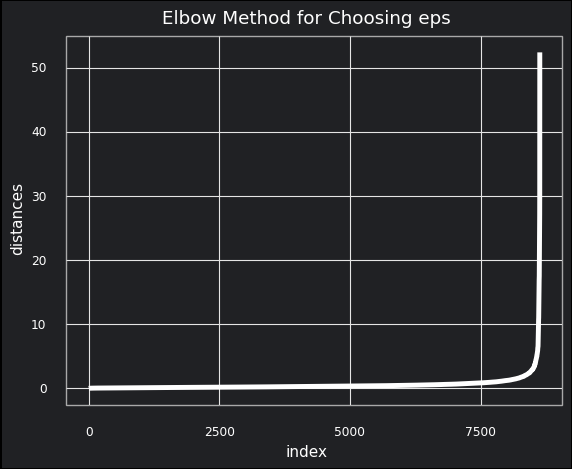

<ggplot: (119270410563)>

In [20]:
#plot the distances
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
our_plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))
ggsave(plot=our_plt, filename='elbow.png', dpi=300)

our_plt

In [21]:
# according to elbow i choosed eps equal 1

In [22]:
for k in range (10,25):
        df_row_DB = DBSCAN(eps = 1, min_samples = k).fit(df_row)
        assignments = df_row_DB.labels_
        ss_= silhouette_score(df_row , assignments )
        print (f"for eps = {1} and min_samples = {k} silhouette_score = {ss_}")

for eps = 1 and min_samples = 10 silhouette_score = 0.29929605484877897
for eps = 1 and min_samples = 11 silhouette_score = 0.2485087080249217
for eps = 1 and min_samples = 12 silhouette_score = 0.33739267643122606
for eps = 1 and min_samples = 13 silhouette_score = 0.4793855055742035
for eps = 1 and min_samples = 14 silhouette_score = 0.5334345124879697
for eps = 1 and min_samples = 15 silhouette_score = 0.5292189410120223
for eps = 1 and min_samples = 16 silhouette_score = 0.5250127907322042
for eps = 1 and min_samples = 17 silhouette_score = 0.5198870378702631
for eps = 1 and min_samples = 18 silhouette_score = 0.5158853375095912
for eps = 1 and min_samples = 19 silhouette_score = 0.5108873103164776
for eps = 1 and min_samples = 20 silhouette_score = 0.5062416854633833
for eps = 1 and min_samples = 21 silhouette_score = 0.3703950746192632
for eps = 1 and min_samples = 22 silhouette_score = 0.3692842177504651
for eps = 1 and min_samples = 23 silhouette_score = 0.36848806726035294
for

In [23]:
# for eps = 1 and min_samples = 14 silhouette_score = 0.5334345124879697 and two clusters
df_row_DB = DBSCAN(eps =1, min_samples =14).fit(df_row)
assignments = df_row_DB.labels_
ss_= silhouette_score(df_row , assignments )
np.unique(assignments).shape[0]

2

Kmeans

In [24]:
df_row = df_pca.copy()

In [25]:
# ploting elbow to find the best k
cl=[]
x =[]
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(df_row)
    cl.append(kmeans.inertia_)
    x. append(k)

c:\Users\pop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:>

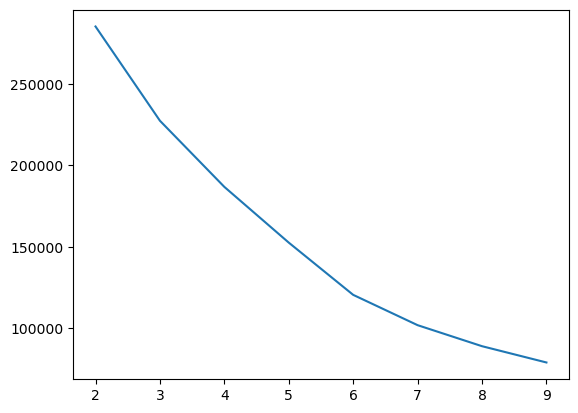

In [26]:
sns.lineplot(x,cl)

In [27]:
# n_clusters=6 , silhouette_score = 0.4432738386931243
kmeans = KMeans(n_clusters=6, max_iter=100)
kmeans.fit(df_row)

silhouette_score(df_row, kmeans.fit_predict(df_row))

0.4432738386931243

Heirarical with silhouette_score = 0.7332953569600494
the best results


In [28]:
df_row = df_pca.copy()

In [29]:
# plotting silhouette_scores to choose k
silhouette_scores = [] 
from sklearn.cluster import AgglomerativeClustering
for k in range(2, 10):
    silhouette_scores.append( 
        silhouette_score(df_row, AgglomerativeClustering(n_clusters = k).fit_predict(df_row))) 

c:\Users\pop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:>

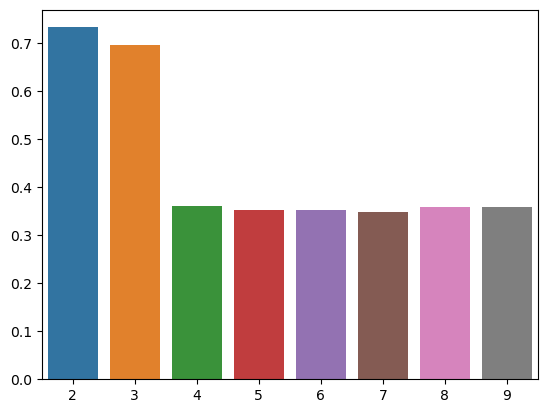

In [30]:
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9] 
sns.barplot(k, silhouette_scores) 

In [31]:
agg=AgglomerativeClustering(n_clusters = 2)
print(silhouette_score(df_row, AgglomerativeClustering(n_clusters = 2).fit_predict(df_row)))

0.7332953569600494


Gaussian Mixture

In [32]:
df_row = df_pca.copy()

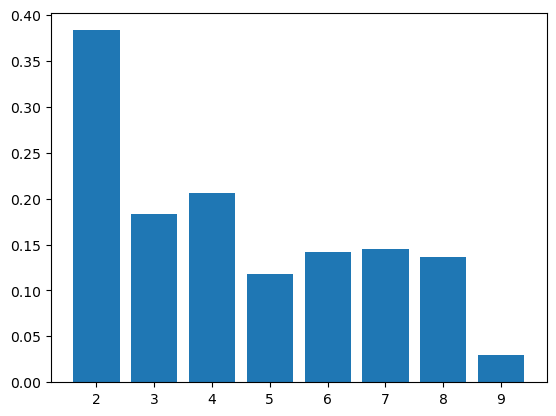

In [33]:
from sklearn.mixture import GaussianMixture
# plotting silhouette_scores to choose k
silhouette_scores2 =[]
ks = []  
for k in range(2,10) :
    gmm = GaussianMixture(n_components=k)
    gmm.fit(df_row)
    labels = gmm.predict(df_row)
    silhouette_scores2.append( 
        silhouette_score(df_row,labels )) 
    ks.append(k)
    # Plotting a bar graph to compare the results 
k = [] 
plt.bar(ks, silhouette_scores2) 
plt.show()

In [34]:
gmm = GaussianMixture(n_components=2)
gmm.fit(df_row)
labels = gmm.predict(df_row)
silhouette_score(df_row,labels )

0.3828269106568023